In [3]:
# Importing and adding required packages
using Distributions, Random,Plots

In [2]:
# Arrays for storing obatained samples and uniform draws
arr=[] 
Xo_arr=[]

# Function which returns index when cumulative probabilty is greater than Uniform draw
function dis_inv(lambda)
    p=exp(-lambda)
    a=p
    Xo = rand(Uniform(0,1))
    push!(Xo_arr,Xo)
    for i in 0:10000      
        if Xo < a
            return i
        else
            p = (lambda/(i+1))*p
            a = a + p
        end
    end
end

# Loop for 
for j in 0:4999
    push!(arr,dis_inv(10))
end

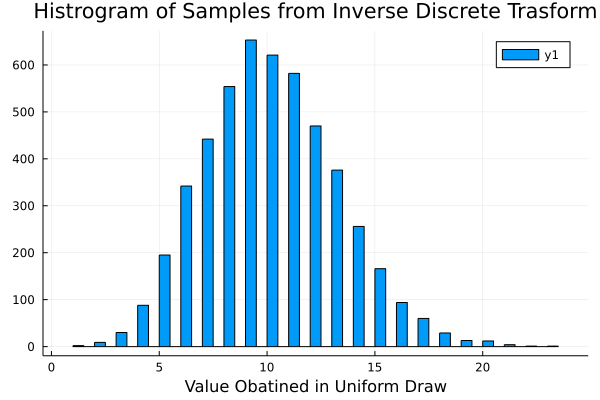

In [4]:
# Plotting Histogram for the inverse discrete tranform sampling mehthod
y=Xo_arr
x=arr
plot(histogram(x, title = "Histrogram of Samples from Inverse Discrete Trasform"))
xlabel!("Value Obatined in Uniform Draw")

2. Implement a Discrete Accept Reject Sampler to simulate draws from Binomial(n, p) using a Poisson proposal.

In [5]:
# Calculation the ratio of Binomial distribution/ Poisson distribution
function ratio(λ,i,n,p)
    return (binomial(n,i)*(p^i)*(1-p)^(n-i)*factorial(big(i)))/(exp(-λ)*(λ^i))
end


function draw_pois(n,p,λ)
    
    accept = 0
    c = ratio(4,0,n,p)
# Obtaining the supremum of P_j/Q_j    
    for i in 1:n
        Ci = ratio(λ,i,n,p)
        if Ci > c
            c = Ci
        end
    end
# Classical accept reject Algorithm when the random draw from poisson distribution is used to check the value of ratio at 
# that value and if the value of uniform draw is less than the required ratio value.
    while accept == 0
        U = rand(Uniform(0,1))
        
        x = dis_inv(λ)
        
        ratio_req = ratio(λ,x,n,p)
        if U < ratio_req
            accept = 1
            return x
        else
            x = x + 1
        end
    end
    
end

draw_pois (generic function with 1 method)

In [6]:
arr_1 = []
for i in 0:999
    push!(arr_1 , draw_pois(10,0.4,5))
end

In [7]:
# Measures off Dispersion
mean_draws = sum(arr_1)/length(arr_1)
var_draws = (sum((arr_1 .- mean_draws) .^ 2))/ 1000
println("Mean = " , mean_draws)
println("Variance = ", var_draws)

Mean = 4.17
Variance = 2.729099999999998


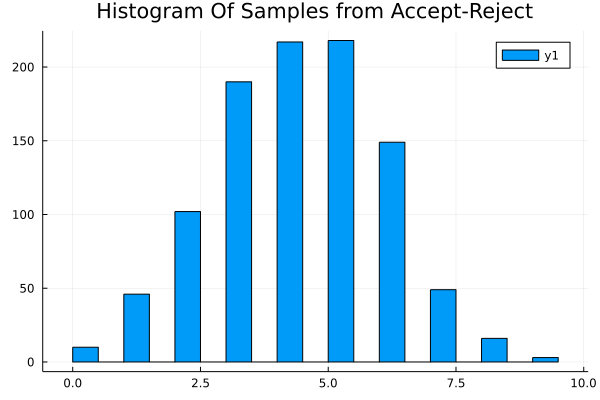

In [8]:
# Histrogram for Accept Reject
plot(histogram(arr_1), title="Histogram Of Samples from Accept-Reject")
